In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
random.seed(22)
import pickle
import time

In [2]:
#time.sleep(1800)

In [3]:
fh = open('A549_read_to_gene_dict', 'rb')
A549_read_dict = pickle.load(fh)
fh.close()

In [4]:
fh = open('HEPG2_read_to_gene_dict', 'rb')
HepG2_read_dict = pickle.load(fh)
fh.close()

In [5]:
fh = open('NTERA_read_to_gene_dict', 'rb')
NTERA_read_dict = pickle.load(fh)
fh.close()

In [6]:
fh = open('SHSY5Y_read_to_gene_dict', 'rb')
SHSY5Y_read_dict = pickle.load(fh)
fh.close()

In [7]:
fh = open('HeLa_read_to_gene_dict', 'rb')
HeLa_read_dict = pickle.load(fh)
fh.close()

In [8]:
saturation_dict = {'HeLa':{}, 'A549':{}, 'NTERA':{}, 'SHSY5Y':{}, 'HepG2':{}}

In [9]:
def unique_genes_from_reads(read_dict, n):
    unique_genes = set()
    for x in random.sample(list(read_dict.keys()), n):
        unique_genes.add(read_dict[x])
    return len(unique_genes)

In [10]:
for i in range(100):
    print(f"{i=}")
    for j in range(0,1000001,100000):
        if j % 500000 == 0:
            print(f"{j=}")
        for key in saturation_dict:
            if j not in saturation_dict[key]:
                saturation_dict[key][j] = {}
        saturation_dict['HeLa'][j][i] = unique_genes_from_reads(HeLa_read_dict, j)
        saturation_dict['A549'][j][i] = unique_genes_from_reads(A549_read_dict, j)
        saturation_dict['NTERA'][j][i] = unique_genes_from_reads(NTERA_read_dict, j)
        saturation_dict['SHSY5Y'][j][i] = unique_genes_from_reads(SHSY5Y_read_dict, j)
        saturation_dict['HepG2'][j][i] = unique_genes_from_reads(HepG2_read_dict, j)

i=0
j=0
j=500000
j=1000000
i=1
j=0
j=500000
j=1000000
i=2
j=0
j=500000
j=1000000
i=3
j=0
j=500000
j=1000000
i=4
j=0
j=500000
j=1000000
i=5
j=0
j=500000
j=1000000
i=6
j=0
j=500000
j=1000000
i=7
j=0
j=500000
j=1000000
i=8
j=0
j=500000
j=1000000
i=9
j=0
j=500000
j=1000000
i=10
j=0
j=500000
j=1000000
i=11
j=0
j=500000
j=1000000
i=12
j=0
j=500000
j=1000000
i=13
j=0
j=500000
j=1000000
i=14
j=0
j=500000
j=1000000
i=15
j=0
j=500000
j=1000000
i=16
j=0
j=500000
j=1000000
i=17
j=0
j=500000
j=1000000
i=18
j=0
j=500000
j=1000000
i=19
j=0
j=500000
j=1000000
i=20
j=0
j=500000
j=1000000
i=21
j=0
j=500000
j=1000000
i=22
j=0
j=500000
j=1000000
i=23
j=0
j=500000
j=1000000
i=24
j=0
j=500000
j=1000000
i=25
j=0
j=500000
j=1000000
i=26
j=0
j=500000
j=1000000
i=27
j=0
j=500000
j=1000000
i=28
j=0
j=500000
j=1000000
i=29
j=0
j=500000
j=1000000
i=30
j=0
j=500000
j=1000000
i=31
j=0
j=500000
j=1000000
i=32
j=0
j=500000
j=1000000
i=33
j=0
j=500000
j=1000000
i=34
j=0
j=500000
j=1000000
i=35
j=0
j=500000
j=1000000
i=

In [11]:
df_hela =pd.DataFrame.from_dict(saturation_dict['HeLa'], orient = 'index')
df_hela.reset_index(inplace=True)
df_hela.rename(columns={'index':'Samples'}, inplace=True)
df_hela = df_hela.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_hela = ['HeLa']*df_hela.shape[0]
df_hela['Cell_Line'] = cell_line_hela

In [12]:
df_a549 =pd.DataFrame.from_dict(saturation_dict['A549'], orient = 'index')
df_a549.reset_index(inplace=True)
df_a549.rename(columns={'index':'Samples'}, inplace=True)
df_a549 = df_a549.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_a549 = ['A549']*df_a549.shape[0]
df_a549['Cell_Line'] = cell_line_a549

In [13]:
df_shsy5y =pd.DataFrame.from_dict(saturation_dict['SHSY5Y'], orient = 'index')
df_shsy5y.reset_index(inplace=True)
df_shsy5y.rename(columns={'index':'Samples'}, inplace=True)
df_shsy5y = df_shsy5y.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_shsy5y = ['SHSY5Y']*df_shsy5y.shape[0]
df_shsy5y['Cell_Line'] = cell_line_shsy5y

In [14]:
df_ntera =pd.DataFrame.from_dict(saturation_dict['NTERA'], orient = 'index')
df_ntera.reset_index(inplace=True)
df_ntera.rename(columns={'index':'Samples'}, inplace=True)
df_ntera = df_ntera.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_ntera = ['NTERA']*df_ntera.shape[0]
df_ntera['Cell_Line'] = cell_line_ntera

In [15]:
df_hepg2 =pd.DataFrame.from_dict(saturation_dict['HepG2'], orient = 'index')
df_hepg2.reset_index(inplace=True)
df_hepg2.rename(columns={'index':'Samples'}, inplace=True)
df_hepg2 = df_hepg2.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_hepg2 = ['HepG2']*df_hepg2.shape[0]
df_hepg2['Cell_Line'] = cell_line_hepg2

In [16]:
df = pd.concat([df_hepg2, df_ntera, df_shsy5y, df_a549, df_hela], axis = 0, ignore_index=True)
df.head()

,Samples,Rep,Saturation,Cell_Line
0,0,0,0,HepG2
1,100000,0,8997,HepG2
2,200000,0,11003,HepG2
3,300000,0,12067,HepG2
4,400000,0,12812,HepG2


In [17]:
sns.set(rc={"figure.figsize":(14, 10)}) #(width, height)

[Text(0.5, 1.0, 'Unique Genes identified in subsampled groups'),
 Text(0.5, 0, 'Reads Sampled From Target Cell Line'),
 Text(0, 0.5, 'Unique Genes Observed in Subsample')]

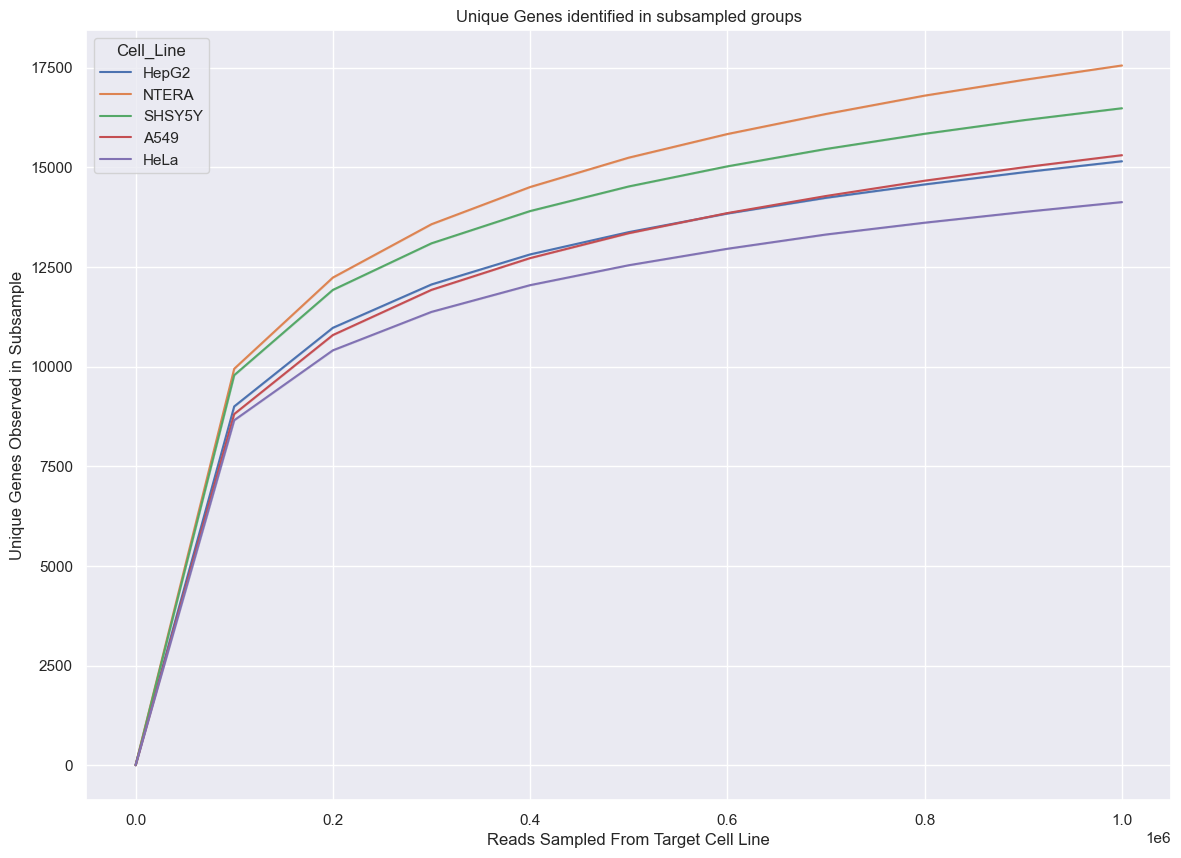

In [18]:
fig = sns.lineplot(data=df, x = 'Samples', y = 'Saturation', hue = 'Cell_Line')
fig.set(title = 'Unique Genes identified in subsampled groups', xlabel = 'Reads Sampled From Target Cell Line', ylabel = 'Unique Genes Observed in Subsample')

In [19]:
fig.get_figure().savefig('NOFILTER_tmp_unique_genes.pdf')
fig.get_figure().savefig('NOFILTER_tmp_unique_genes.png')

In [20]:
fig.get_figure().savefig('NOFILTER_unique_genes.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [21]:
df

,Samples,Rep,Saturation,Cell_Line
0,0,0,0,HepG2
1,100000,0,8997,HepG2
2,200000,0,11003,HepG2
3,300000,0,12067,HepG2
4,400000,0,12812,HepG2
...,...,...,...,...
5495,600000,99,12920,HeLa
5496,700000,99,13260,HeLa
5497,800000,99,13592,HeLa
5498,900000,99,13959,HeLa


In [24]:
np.mean(df[(df['Cell_Line'] == 'HeLa') & (df['Samples'] == 800000)]['Saturation'])

13608.08